# EDA for clusters problem
## Main Objetive
1.	Perform a statistical analysis of the Dataset variables ('DATOS.csv'), where the distribution of variables, quality problems, among others, can be evidenced.
2.	Develop a segmentation process using clustering algorithms, including: Method to determine the optimal number of segments, Characterization of the resulting segments, Quality metrics of the resulting segments.




In [ ]:
#Libraries
import pandas as pd 
import numpy as np 
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Functions
def Nulos(df, lista):
    for i in lista: 
        print('Col: {} / Nans: {} / Tipo de dato: {}\n'.format(i, df[i].isnull().sum(), df[i].dtype))
def Edad(x): 
    try: 
        y = 2022- int(x)
    except: 
        y = x
        pass
    return y

def Años(df, columna = str()):
    df[columna] = df[columna].astype(str)
    df[columna] = df[columna].apply(lambda x: list(x.split('-'))[0])
    df[columna] = df[columna].apply(lambda x: Edad(x))
    
from scipy import stats
import pandas as pd
import numpy as np
import inspect
import warnings

warnings.filterwarnings('ignore')

def IQR(df, col): 
    # df = data.copy()
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    
    upper_bound = df[col] >= (Q3+1.5*IQR)
    lower_bound = df[col] <= (Q1-1.5*IQR)
    
    upper_points = np.where(upper_bound)
    df.drop(upper_points[0], inplace=True)
    df.reset_index(inplace = True, drop = True)

In [6]:
dta = pd.read_csv('./DATOS.csv')

In [141]:
data = dta.copy()
columnas = data.columns

## Data Transformation & Analysis
So far these are the first steps of data transformation. For the cleaning, an exploration of the data that do not have relevant information or that may alter the expected results will be carried out. Among them, there are outliers, repeated values, incorrectly filled in values. The risk information will be changed later, but for graphical reasons, it is best to leave it as categorical.

In [142]:
#Transformation
data['GENERO_NUM']= pd.get_dummies(data['GENERO']).values[:,0] #Valores numericos
Años(data, 'FECHA_NACIMIENTO') #Colocar los años de las personas
try:
    Nulos(data,['PAIS_RESIDENCIA'])
except:
    pass
'''Teniendo en cuenta la información de los dato nulos, se eliminan las variables
de Pais.'''
data.drop('PAIS_RESIDENCIA', axis = 1, inplace = True)

Col: PAIS_RESIDENCIA / Nans: 99972 / Tipo de dato: object



This part is crucial for the future application of the model. One of the biggest problems of the database is the presence of outliers. These outliers do not allow the models to be applied in the best way, leading to erroneous results. For this, the IQR method is applied, which eliminates all the data that are outside a range established by the values of the 25th and 75th quantile. 

This method reduces the sample size considerably. Therefore, in order to carry out a reliable test, it was decided to use the columns of Assets, Liabilities, Equity, Monthly Income and Expenses. The procedure was done iteratively until it converged to a value that is presented in the following lines of code.




In [143]:
#Funcion para la eliminacion todos los outliers
cols = ['ACTIVOS', 'PASIVOS', 'PATRIMONIO','INGRESOS_MENSUALES',
          'EGRESOS_MENSUALES']
l = 0
n = 1
while l != n : 
    l = data.shape[0]
    for i in cols: 
        IQR(data, i)
    n = data.shape[0]
    data.reset_index(inplace =True, drop = True)
print(data.shape[0])

88625


In [144]:
print('''Base de datos antes de quitar los autliers {}
Base luego de quitar los outliers {}'''.format(dta.shape[0], data.shape[0]))  

Base de datos antes de quitar los autliers 282389
Base luego de quitar los outliers 88625


Taking into account the reduction, it is up to the data collectors to decide on the relevance of the implemented methodology or a possible methodology to be able to use the data. One proposal is to create a separate sample with all the outliers and perform a separate analysis.

In [145]:
#Description of the database used so far
data.describe().T

,count,mean,std,min,25%,50%,75%,max
INGRESOS_MENSUALES,88625.0,1.535940e+06,8.713446e+05,0.0,900000.0,1478333.0,2100000.0,3899999.0
EGRESOS_MENSUALES,88625.0,1.049148e+06,7.177891e+05,0.0,500000.0,900000.0,1510750.0,3026667.0
ACTIVOS,88625.0,3.761858e+06,2.688773e+06,0.0,1600000.0,3000000.0,5000000.0,10080000.0
PASIVOS,88625.0,5.313516e+05,6.817988e+05,0.0,0.0,150000.0,1000000.0,2499000.0
PATRIMONIO,88625.0,3.230506e+06,2.657664e+06,-2486000.0,1051000.0,2730000.0,4900000.0,10080000.0
VALOR_OPERACIONES_INGRESO,88625.0,2.552695e+05,1.749183e+06,0.0,15000.0,41600.0,70088.0,122866135.0
TRANSACCIONES_OPERACIONES_INGRESO,88625.0,9.737320e-01,7.675024e-01,0.0,1.0,1.0,1.0,34.0
VALOR_OPERACIONES_EGRESO,88625.0,1.193364e+05,8.584911e+05,0.0,0.0,0.0,46000.0,90867208.0
TRANSACCIONES_OPERACIONES_EGRESO,88625.0,4.563611e-01,7.643101e-01,0.0,0.0,0.0,1.0,22.0
GENERO_NUM,88625.0,6.322595e-01,4.821930e-01,0.0,0.0,1.0,1.0,1.0


## Graphic Analysis 

In [146]:
def analysis_column(col): 
    print('NOMBRE: {}'.format(col.name))
    print('MEDIA: {}'.format(col.mean()))
    print('MEDIANA: {}'.format(col.median()))
    print('VALORES NANS: {}'.format(col.isnull().sum()))
    print('TIPO DE DATOS: {}'.format(col.dtype))
    print('#################################')

This first graph shows the distribution and the boxplot for the variables used. In this case, a normal function is drawn on the graphs taking into account the mean and variance parameters of each variable. In the first instance, no column has a normal distribution (graphical revision, avoiding the implementation of statistical tests).

<AxesSubplot:title={'center':'Distribución-Egresos mensuales'}, xlabel='EGRESOS_MENSUALES', ylabel='Density'>

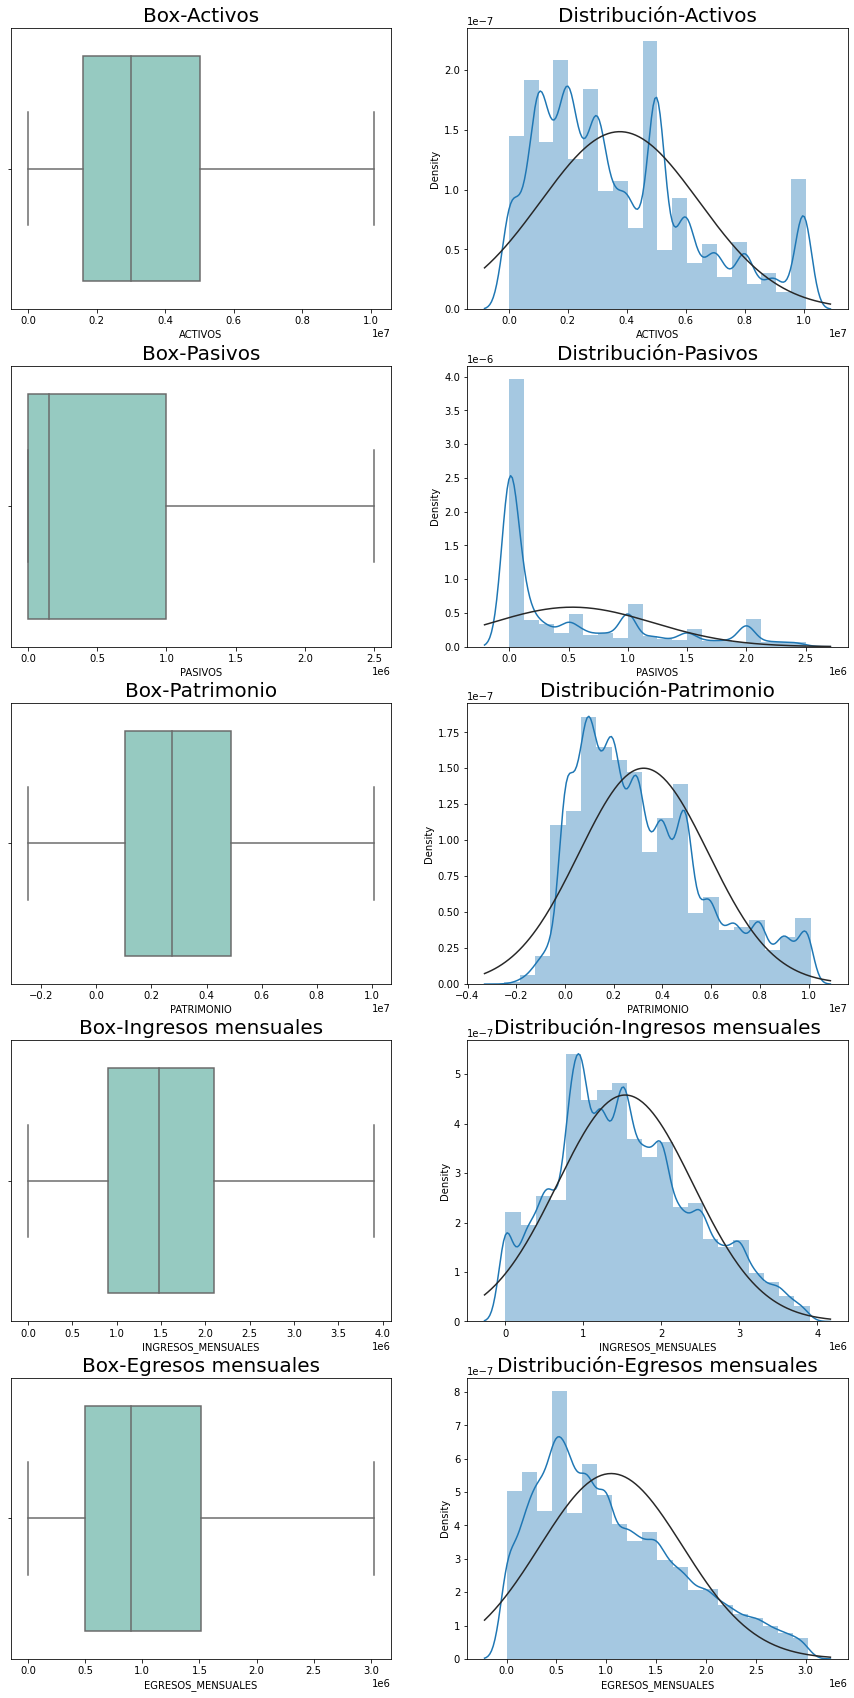

In [147]:
#Figura para medir las distribucion de las variables utilizadas
fig, axes = plt.subplots(nrows=5, ncols = 2, figsize = (15,30))
axes[0,0].set_title('Box-Activos', fontsize=20)
axes[0,1].set_title('Distribución-Activos',fontsize=20)
axes[1,0].set_title('Box-Pasivos',fontsize=20)
axes[1,1].set_title('Distribución-Pasivos',fontsize=20)
axes[2,0].set_title('Box-Patrimonio',fontsize=20)
axes[2,1].set_title('Distribución-Patrimonio',fontsize=20)
axes[3,0].set_title('Box-Ingresos mensuales',fontsize=20)
axes[3,1].set_title('Distribución-Ingresos mensuales',fontsize=20)
axes[4,0].set_title('Box-Egresos mensuales',fontsize=20)
axes[4,1].set_title('Distribución-Egresos mensuales',fontsize=20)
sns.boxplot(data.ACTIVOS, orient = 'h', ax = axes[0,0],palette="Set3")
sns.distplot(data.ACTIVOS , bins = 20, fit = norm, ax = axes[0,1])
sns.boxplot(data.PASIVOS, orient = 'h', ax = axes[1,0],palette="Set3")
sns.distplot(data.PASIVOS , bins = 20, fit = norm, ax = axes[1,1])
sns.boxplot(data.PATRIMONIO, orient = 'h', ax = axes[2,0],palette="Set3")
sns.distplot(data.PATRIMONIO , bins = 20, fit = norm, ax = axes[2,1])
sns.boxplot(data.INGRESOS_MENSUALES, orient = 'h', ax = axes[3,0],palette="Set3")
sns.distplot(data.INGRESOS_MENSUALES , bins = 20, fit = norm, ax = axes[3,1])
sns.boxplot(data.EGRESOS_MENSUALES, orient = 'h', ax = axes[4,0],palette="Set3")
sns.distplot(data.EGRESOS_MENSUALES , bins = 20, fit = norm, ax = axes[4,1])


In [40]:
analysis_column(data.ACTIVOS)
analysis_column(data.PASIVOS)
analysis_column(data.PATRIMONIO)
analysis_column(data.INGRESOS_MENSUALES)
analysis_column(data.EGRESOS_MENSUALES)

NOMBRE: ACTIVOS
MEDIA: 3761857.66512835
MEDIANA: 3000000.0
VALORES NANS: 0
TIPO DE DATOS: int64
#################################
NOMBRE: PASIVOS
MEDIA: 531351.6482627927
MEDIANA: 150000.0
VALORES NANS: 0
TIPO DE DATOS: float64
#################################
NOMBRE: PATRIMONIO
MEDIA: 3230506.0168655566
MEDIANA: 2730000.0
VALORES NANS: 0
TIPO DE DATOS: float64
#################################
NOMBRE: INGRESOS_MENSUALES
MEDIA: 1535940.163123385
MEDIANA: 1478333.0
VALORES NANS: 0
TIPO DE DATOS: float64
#################################
NOMBRE: EGRESOS_MENSUALES
MEDIA: 1049147.7022350354
MEDIANA: 900000.0
VALORES NANS: 0
TIPO DE DATOS: float64
#################################


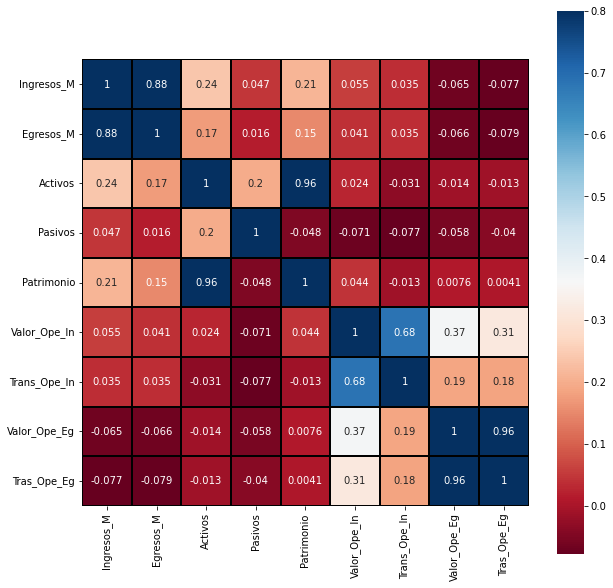

In [45]:
cor = data.corr(method='spearman')
#De manera grafica, se observa que en la mayoria de las distribucioines no se cumple 
#el suspuesto de normalidad
idx = ['Ingresos_M', 'Egresos_M', 'Activos', 'Pasivos', 
       'Patrimonio', 'Valor_Ope_In', 'Trans_Ope_In',
       'Valor_Ope_Eg', 'Tras_Ope_Eg']
cor.index = idx
cor.columns = idx
plt.figure(figsize = (10,10))
sns.heatmap(cor, vmax = 0.8, linewidths=0.01, square = True, annot = True, cmap= "RdBu", linecolor = 'black');

Cantidad de mujer y hombres
F    56034
M    32591
Name: GENERO, dtype: int64
CANTIDAD DE NANS: 0


Text(0.5, 1.0, 'Cantidad de mujer y hombres')

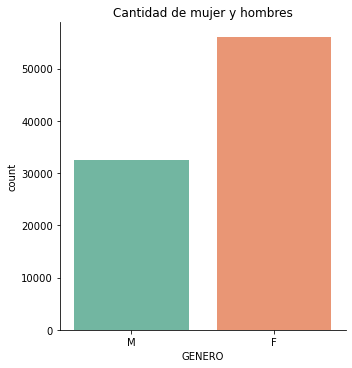

In [47]:
#EXPLORACIÓN DE VALORES DISCRETOS
#Cantidad de de personas por genero
print('Cantidad de mujer y hombres')
print(data.GENERO.value_counts())
print('CANTIDAD DE NANS: {}'.format(data.GENERO.isnull().sum()))
'''En este momento se tiene 109430 Mujeres y 68318 Hombres'''

sns.factorplot('GENERO', data = data, kind = 'count', palette="Set2");
plt.title('Cantidad de mujer y hombres')


Cantidad de Personas por riego
BAJO     52222
MEDIO    29268
ALTO      7135
Name: RIESGO_CLIENTE, dtype: int64
CANTIDAD DE NANS: 0


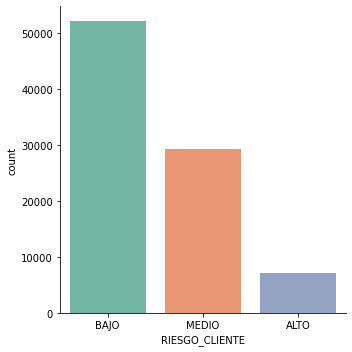

In [48]:
#Informacion del riesgo

print('Cantidad de Personas por riego')
print(data.RIESGO_CLIENTE.value_counts())
print('CANTIDAD DE NANS: {}'.format(data.RIESGO_CLIENTE.isnull().sum()))
sns.factorplot('RIESGO_CLIENTE', data = data, kind = 'count', palette="Set2")

## Clustering
The K-means model was chosen for the modeling. It was also planned to implement a hierarchical clustering model, but due to computational needs it was not applied. One of the requirements to implement this model is the dimensionality of the variables. In this case, 2 dependent variables must be obtained to define the labels. 

Therefore, the next step is to reduce the dimensionality of the 8 variables that will be used. An unsupervised PCA model is used, in which 2 components are stipulated. In addition, to carry out this procedure, the dependent values are standardized. 

The first graph shows a scatter plot of both components. A segmentation of the data into 2 different squares can be seen at a glance. For this reason, the first test is performed with a Kmeans model with 2 clusters (k = 2). However, a procedure for analyzing the optimal k number is performed later on. 



In [ ]:

#One-hot-encoding para el tema de los riesgos
data_model = pd.get_dummies(data, columns=["RIESGO_CLIENTE"], prefix="RIESGO")

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

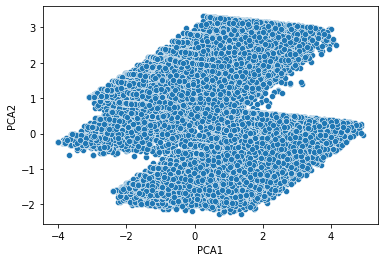

In [149]:
from sklearn.preprocessing import StandardScaler
#Modelo de Principal Component Analysis para bajar la dimensionalidad
model_cols = ['ACTIVOS', 'PASIVOS', 'PATRIMONIO','INGRESOS_MENSUALES',
          'EGRESOS_MENSUALES', 'RIESGO_ALTO', 'RIESGO_BAJO', 'RIESGO_MEDIO']
x = data_model.loc[:,model_cols].values
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
df_pca = pd.DataFrame(data = principalComponents
             , columns = ['PCA1', 'PCA2'])
#Revisar normalizacion o estandarizacion. 

sns.scatterplot(x=df_pca.PCA1,y=df_pca.PCA2)

The variance ratio of the two components explains 53% of the variance of the entire sample. This value should be reviewed to know if it is pertinent to continue testing with this data or if another methodology should be sought. In terms of application and testing, this information obtained will continue to be used. 

In [112]:
pca.explained_variance_ratio_
#

array([0.30443244, 0.22991779])

In [113]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

modelo_kmeans = KMeans(n_clusters=2, random_state=42)
modelo_kmeans.fit(X=df_pca)
y_predict = modelo_kmeans.labels_

The result of the first model shows a segmentation similar to the one previously seen visually. In addition, the location of the centroids is performed in order to have clear the convergence point of this data. 

This would give us an indication of a simple segmentation for the case of the variables used. 


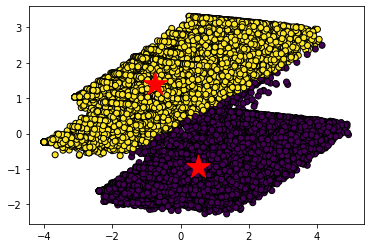

In [114]:
plt.scatter(
        x = df_pca['PCA1'],
        y = df_pca['PCA2'], 
        c = y_predict,
        cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
plt.scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1], 
    c = 'red',
    s = 600,
    marker = '*',
    label  = 'centroides'
)

The next step is to estimate the number of clusters using the evolution of the intra-cluster variance. As can be seen in the graph, k = 2 is not the value that standardizes the value of the intra cluster variance. For this case, using the elbow technique, k = 6 is set as the second possible model that fits the data.

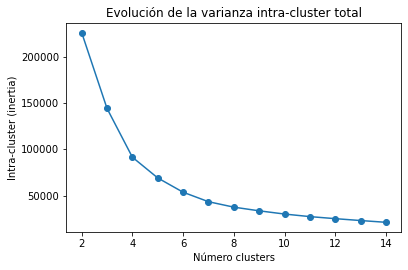

In [115]:
#Se puede saber cual es la cantidad de cluster indicada
range_n_clusters = range(2,15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    modelo_kmeans.fit(X=df_pca)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

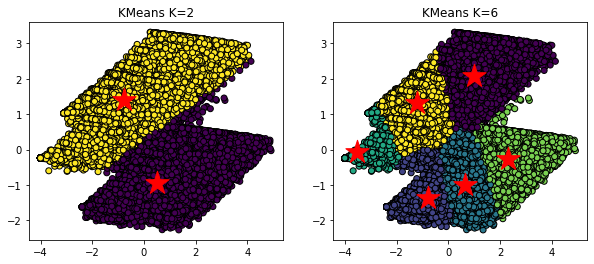

In [128]:
#Aqui se presenta la comparación de ambos modelos
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Resultados para K = 2 
# ==============================================================================

modelo_kmeans_2 = KMeans(n_clusters=2, random_state=42)
modelo_kmeans_2.fit(X=df_pca)
y_predict_2 = modelo_kmeans_2.labels_
ax[0].scatter(
        x = df_pca['PCA1'],
        y = df_pca['PCA2'], 
        c = y_predict_2,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[0].scatter(
    x = modelo_kmeans_2.cluster_centers_[:, 0],
    y = modelo_kmeans_2.cluster_centers_[:, 1], 
    c = 'red',
    s = 600,
    marker = '*',
    label  = 'centroides'
)
ax[0].set_title('KMeans K=2');

# Resultados para K = 6
# ==============================================================================
modelo_kmeans_6 = KMeans(n_clusters=6, random_state=42)
modelo_kmeans_6.fit(X=df_pca)
y_predict_6 = modelo_kmeans_6.labels_
ax[1].scatter(
        x = df_pca['PCA1'],
        y = df_pca['PCA2'],
        c = y_predict_6,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].scatter(
    x = modelo_kmeans_6.cluster_centers_[:, 0],
    y = modelo_kmeans_6.cluster_centers_[:, 1], 
    c = 'red',
    s = 600,
    marker = '*',
    label  = 'centroides'
)
ax[1].set_title('KMeans K=6');


In [137]:
data_model['labels_2'] = y_predict_2
data_model['labels_6'] = y_predict_6
data_model['labels_2'] = data_model['labels_2'].astype(str)
data_model['labels_6'] = data_model['labels_6'].astype(str)
data_model['labels_2'] = data_model['labels_2'].map({'0': 'Primero', 
                                                     '1': 'Segundo'})
data_model.head()

,ID_Registro,FECHA_NACIMIENTO,GENERO,CIUDAD,DEPARTAMENTO,INGRESOS_MENSUALES,EGRESOS_MENSUALES,ACTIVOS,PASIVOS,PATRIMONIO,VALOR_OPERACIONES_INGRESO,TRANSACCIONES_OPERACIONES_INGRESO,VALOR_OPERACIONES_EGRESO,TRANSACCIONES_OPERACIONES_EGRESO,GENERO_NUM,RIESGO_ALTO,RIESGO_BAJO,RIESGO_MEDIO,labels_2,labels_6
0,ID_0,60,M,NaN,NaN,1000000.0,200000.0,10000000,200000.0,9800000.0,15000.0,1,0.0,0,0,0,1,0,Primero,4
1,ID_1,60,F,NaN,NaN,700000.0,200000.0,2000000,50000.0,1950000.0,15000.0,1,0.0,0,1,0,0,1,Segundo,5
2,ID_3,63,F,MUNICIPIO DE CALI,VALLE DEL CAUCA,1000000.0,800000.0,2500000,300000.0,2200000.0,53953.0,1,53212.0,2,1,0,0,1,Segundo,5
3,ID_7,50,M,MUNICIPIO DE CARTAG0,VALLE DEL CAUCA,1500000.0,500000.0,5000000,300000.0,4700000.0,31500.0,1,28614.0,2,0,0,1,0,Primero,2
4,ID_8,52,M,MUNICIPIO DE ARMENIA,QUINDIO,2500000.0,1000000.0,3000000,0.0,3000000.0,7500.0,1,12048.0,2,0,0,0,1,Segundo,5


## Characterization of resulting segments
Attempting to observe graphically the segmentations performed, the relationships (scatterplots) between all the implemented variables are shown, separated by the labels provided by the model. In this case, a noise is evidenced that does not allow to identify in an exact way the characteristics of each segment. However, for the second group, there is a noticeable concentration on the monthly expenses and the Assets, Liabilities and Equity variables. For the rest, there is no clear segmentation. 

For the second model (k = 6), there is a slightly clearer segmentation of some of the groups. In this case, group 3 has clear characteristics that can be used for effective decision making depending on what is to be proposed. In the case of groups 4 and 0, there is evidence of similar characteristics that allow segmenting the sample. The relationship between people's assets and monthly income can be interesting. 


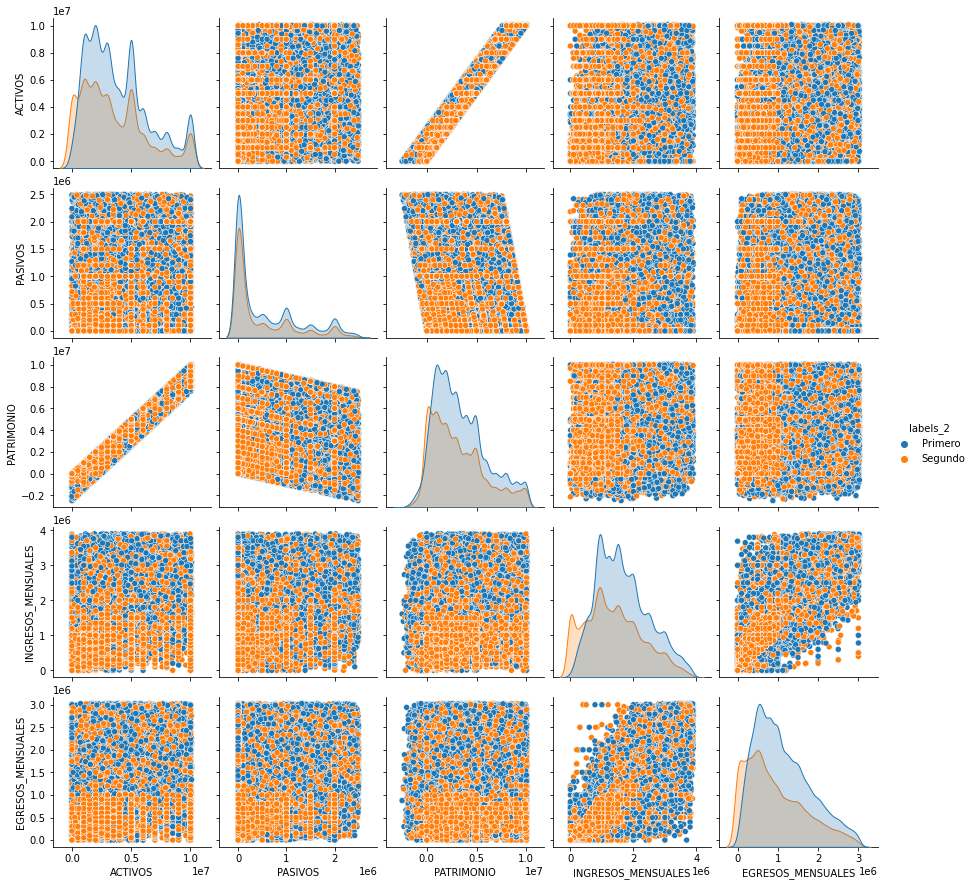

In [138]:
cols = ['ACTIVOS', 'PASIVOS', 'PATRIMONIO','INGRESOS_MENSUALES',
          'EGRESOS_MENSUALES', 'labels_2']
sns.pairplot(data_model[cols], hue = 'labels_2')

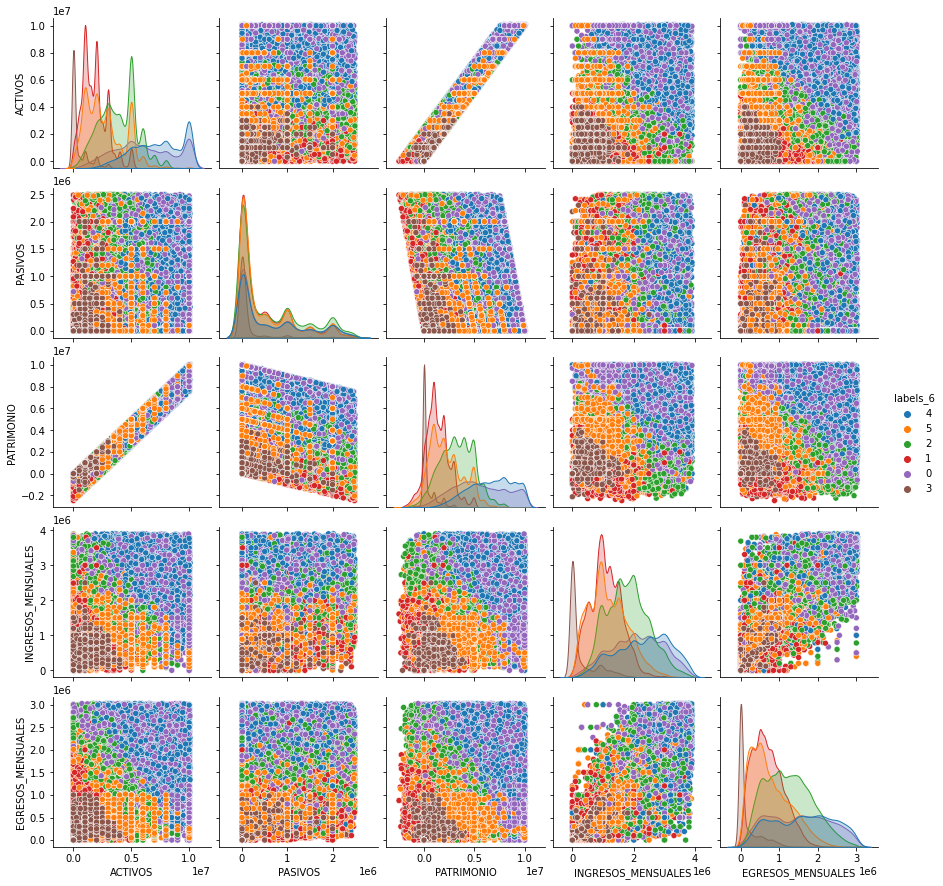

In [136]:
cols = ['ACTIVOS', 'PASIVOS', 'PATRIMONIO','INGRESOS_MENSUALES',
          'EGRESOS_MENSUALES', 'labels_6']
sns.pairplot(data_model[cols], hue = 'labels_6')

## Final Thoughts

In conclusion, I would like to emphasize that an attempt was made to implement evaluation metrics for the model, but due to computational demands they were not implemented. Rand Index, V-measure and Silhouette Score metrics were considered.  Other hierarchical cluster models were considered, but no satisfactory results were obtained. 

In [84]:
#Comprobacion de la calidad de los clusters: 
#Nombrar las diferentes metricas de evalucacion 
#Se utilizara unicamente Silhuette Score
from sklearn import metrics
print('Silhouette k=2 %.2f' %  metrics.silhouette_score(df_pca.values, y_predict_2,  
                                                    metric='euclidean'))
print('Silhouette k=6 %.2f' %  metrics.silhouette_score(df_pca, modelo_kmeans_6.labels_,  
                                                    metric='euclidean'))

MemoryError: Unable to allocate 1.00 GiB for an array with shape (1514, 88625) and data type float64